In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
#载入数据集
mnist = input_data.read_data_sets('/Users/ruicheng/Documents/上海师范研究生/tensorflow学习/MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/ruicheng/Documents/上海师范研究生/tensorflow学习/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/ruicheng/Documents/上海师范研究生/tensorflow学习/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /Users/ruicheng/Documents/上海师范研究生/tensorflow学习/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/ruicheng/Documents/上海师范研究生/tensorflow学习/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
#每个批次的大小
batch_size = 100
#计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)#控制dropout

#创建一个简单的神经网络
W1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))#权重用截断的正态分布初始化，标准差为0.1
b1 = tf.Variable(tf.zeros([200])+0.1)#偏差为0+0.1
L1 = tf.nn.tanh(tf.matmul(x,W1)+b1)
L1_drop = tf.nn.dropout(L1,keep_prob)

W2 = tf.Variable(tf.truncated_normal([200,200],stddev=0.1))#权重用截断的正态分布初始化，标准差为0.1
b2 = tf.Variable(tf.zeros([200])+0.1)#偏差为0+0.1
L2 = tf.nn.tanh(tf.matmul(L1_drop,W2)+b2)
L2_drop = tf.nn.dropout(L2,keep_prob)

W3 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1))#权重用截断的正态分布初始化，标准差为0.1
b3 = tf.Variable(tf.zeros([100])+0.1)#偏差为0+0.1
L3 = tf.nn.tanh(tf.matmul(L2_drop,W3)+b3)
L3_drop = tf.nn.dropout(L3,keep_prob)

W4 = tf.Variable(tf.truncated_normal([100,10],stddev=0.1))#权重用截断的正态分布初始化，标准差为0.1
b4 = tf.Variable(tf.zeros([10])+0.1)#偏差为0+0.1
# prediction = tf.nn.softmax(tf.matmul(L3_drop,W4) + b4)
# prediction = tf.matmul(x,W) + b
prediction = tf.matmul(L3_drop,W4) + b4

# #二次代价函数
# loss = tf.reduce_mean(tf.square(y-prediction))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
#使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

#初始化变量
init = tf.global_variables_initializer()

#结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,axis=1),tf.argmax(prediction,axis=1))#argmax返回一维张量中最大的值所在的位置
#求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
test_acc_arr = []
train_acc_arr = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(31):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.7})#训练dropout
        
        test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})#测试不用dropout
        test_acc_arr.append(test_acc)
        train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1.0})
        train_acc_arr.append(train_acc)
        print('Iter ' + str(epoch) + ',Training Accuracy ' + str(train_acc),'Iter ' + str(epoch) + ',Testing Accuracy ' + str(test_acc))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Iter 0,Training Accuracy 0.92905456 Iter 0,Testing Accuracy 0.9313
Iter 1,Training Accuracy 0.9446909 Iter 1,Testing Accuracy 0.9423
Iter 2,Training Accuracy 0.952 Iter 2,Testing Accuracy 0.9522
Iter 3,Training Accuracy 0.96090907 Iter 3,Testing Accuracy 0.9577
Iter 4,Training Accuracy 0.96665454 Iter 4,Testing Accuracy 0.9614
Iter 5,Training Accuracy 0.9676727 Iter 5,Testing Accuracy 0.9633
Iter 6,Training Accuracy 0.9709091 Iter 6,Testing Accuracy 0.9653
Iter 7,Training Accuracy 0.9740546 Iter 7,Testing Accuracy 0.9685
Iter 8,Training Accuracy 0.9759455 Iter 8,Testing Accuracy 0.9681
Iter 9,Training Accuracy 0.97703636 Iter 9,Testing Accuracy 0.9695
Iter 10,Training Accuracy 0.97694546 Iter 10,Testing Accuracy 0.9684
Iter 11,Training Accuracy 0.9791091 Iter 11,Testing Accuracy 0.9693
Iter 12,Tra

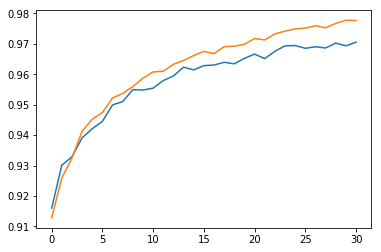

In [14]:
import matplotlib.pyplot as plt

plt.plot(test_acc_arr)
plt.plot(train_acc_arr)
plt.show()